Yilei Dong | ID: 1466802171 | DSCI 352

Classifying spine conditions of patients with a k-nearest neighbors algorithm. 

In [1]:
# Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
import math 
%matplotlib inline 

### a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column. 

Spine conditions are classified as either normal or abnormal. Abnormal class consists of patients with either disk hernia or spondylolisthesis. 

In [22]:
# https://stackoverflow.com/questions/44937223/
# how-to-configure-pandas-to-read-dat-file
# https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition

# Read in dataset & name data columns 
data = pd.read_csv('column_2C.dat', header=None, 
    delim_whitespace=True, error_bad_lines=False, engine='python')
data.columns = ['pelvic.incidence', 'pelvic.tilt', 'lumbar.lordosis.angle',
'sacral.slope', 'pelvic.radius', 'grade.of.spondylolisthesis', 'class.label']

# Assign binary class labels 
data.loc[data['class.label'] == 'AB', 'class.label'] = 1
data.loc[data['class.label'] == 'NO', 'class.label'] = 0

# Display part of dataframe
data.head()

,pelvic.incidence,pelvic.tilt,lumbar.lordosis.angle,sacral.slope,pelvic.radius,grade.of.spondylolisthesis,class.label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [23]:
# Characteristics & summary statistics of dataset 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic.incidence              310 non-null float64
pelvic.tilt                   310 non-null float64
lumbar.lordosis.angle         310 non-null float64
sacral.slope                  310 non-null float64
pelvic.radius                 310 non-null float64
grade.of.spondylolisthesis    310 non-null float64
class.label                   310 non-null int64
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


,pelvic.incidence,pelvic.tilt,lumbar.lordosis.angle,sacral.slope,pelvic.radius,grade.of.spondylolisthesis,class.label
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742,0.677419
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883,0.468220
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000,0.000000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000,0.000000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000,1.000000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000,1.000000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000,1.000000


In [24]:
# Prepare independent & dependent variables for data analysis & kNN classification
x = data.iloc[:, :6]
y = data['class.label'].to_numpy()
y = LabelEncoder().fit_transform(y)

### b) Pre-Processing and Exploratory data analysis:
#### i) Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1 for spine condition. 

Spine conditions
- Class 0: Normal 
- Class 1: Abnormal 

C:\Users\yilei\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\yilei\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


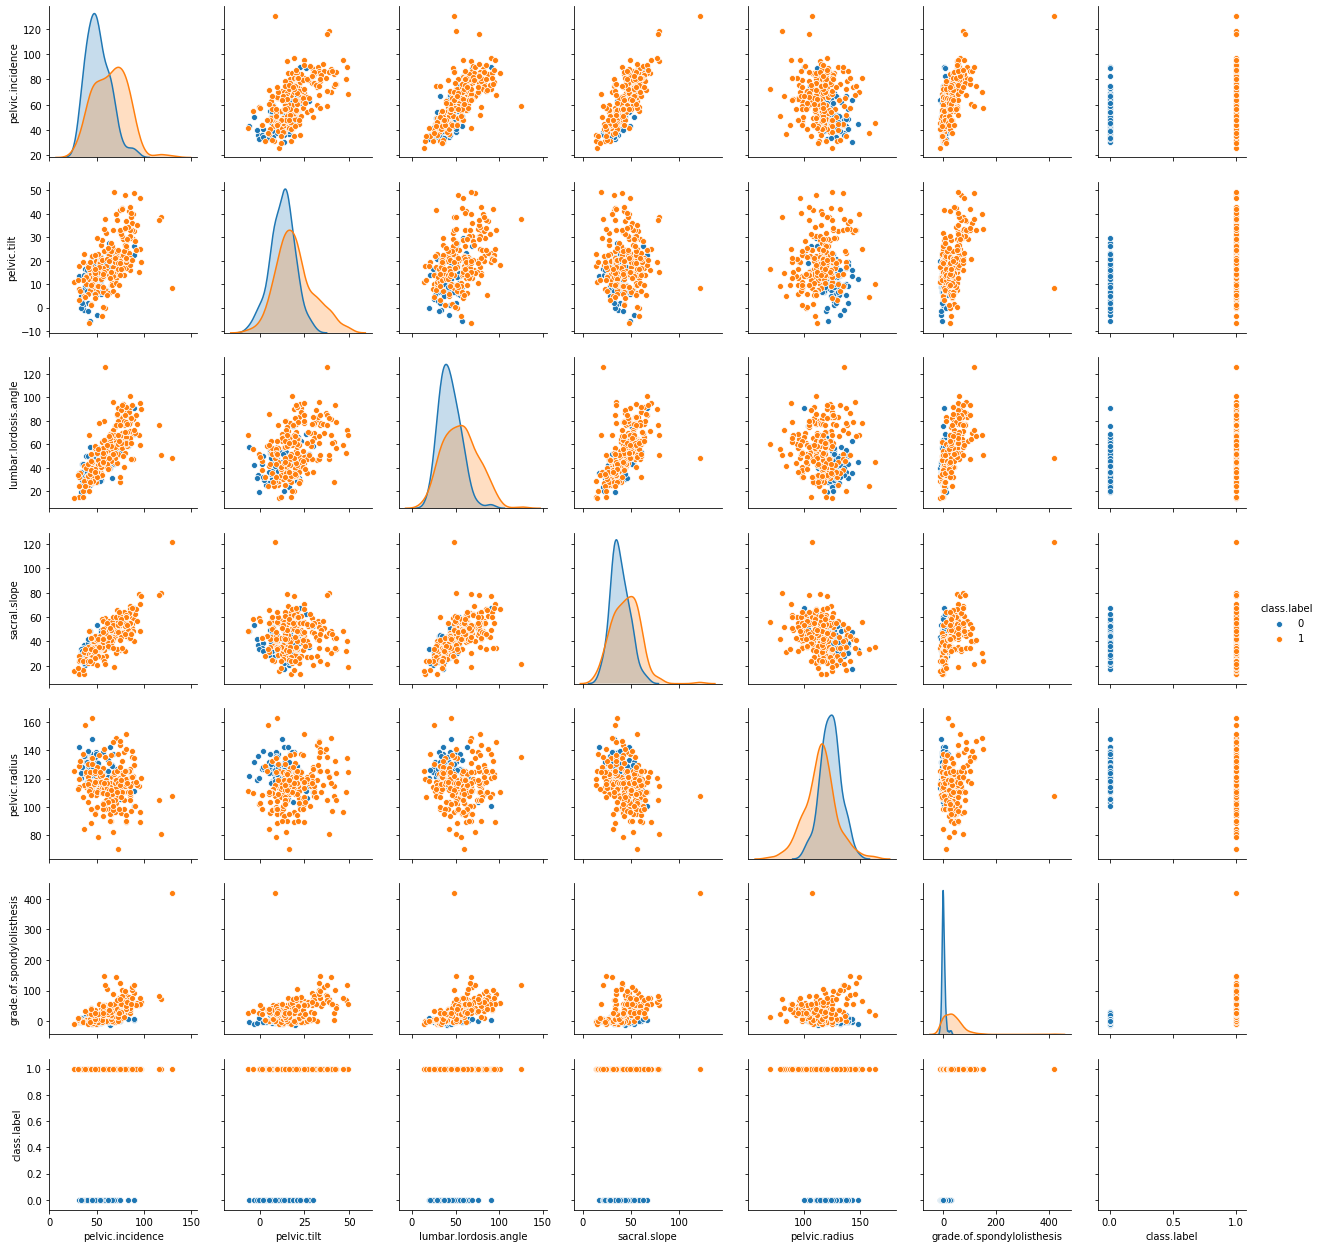

In [25]:
import seaborn as sns 
sns.pairplot(data, hue='class.label')

#### b) Pre-Processing and Exploratory data analysis:
#### ii) Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 for spine condition.

Pelvic incidence & spine condition: 

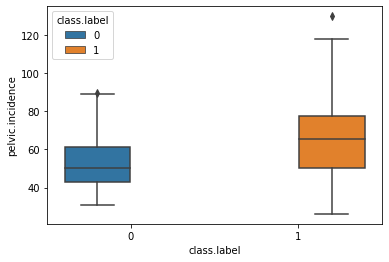

In [6]:
sns.boxplot(x=data['class.label'], y=data['pelvic.incidence'], hue=data['class.label'])

Pelvic tilt & spine condition: 

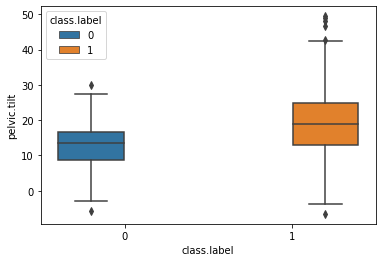

In [7]:
sns.boxplot(x=data['class.label'], y=data['pelvic.tilt'], hue=data['class.label'])

Lumbar Lordosis angle & spine condition: 

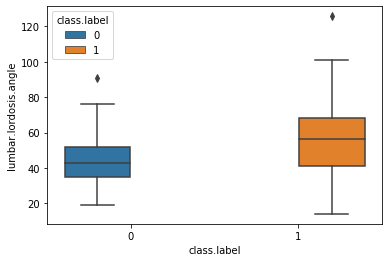

In [8]:
sns.boxplot(x=data['class.label'], y=data['lumbar.lordosis.angle'], hue=data['class.label'])

Sacral slope & spine condition: 

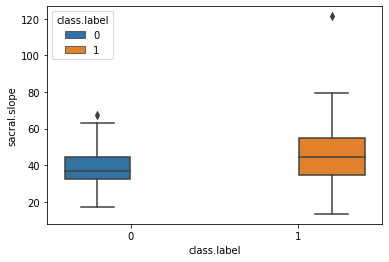

In [9]:
sns.boxplot(x=data['class.label'], y=data['sacral.slope'], hue=data['class.label'])

Pelvic radius & spine condition: 

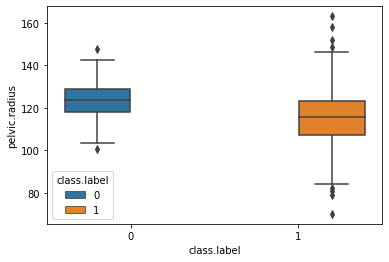

In [10]:
sns.boxplot(x=data['class.label'], y=data['pelvic.radius'], hue=data['class.label'])

Grade of spondylolisthesis & spine condition: 

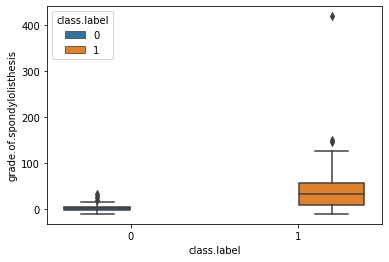

In [11]:
sns.boxplot(x=data['class.label'], y=data['grade.of.spondylolisthesis'], hue=data['class.label'])

### b) Pre-Processing and Exploratory data analysis:
#### iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [12]:
# https://pythonhealthcare.org/2018/12/22/112-splitting-data-set-
# into-training-and-test-sets-using-pandas-dataframes-methods/

# Create dataframe for class 0
dataclass0 = data.loc[data['class.label']==0] # starts at index 210

xdataclass0 = dataclass0.drop('class.label', axis=1)
x0_train = xdataclass0[:70] # indexes from 210-279
x0_test = xdataclass0[70:] # indexes from 280-309

ydataclass0 = dataclass0['class.label']
y0_train = ydataclass0[:70] # indexes from 210-279
y0_test = ydataclass0[70:] # indexes from 280-309

# Dataframe for class 1 
dataclass1 = data.loc[data['class.label']==1] # starts at index 0
xdataclass1 = dataclass1.drop('class.label', axis=1)

x1_train = xdataclass1[:140] # indexes from 0 to 139
x1_test = xdataclass1[140:] # indexes from 140 to 209

ydataclass1 = dataclass1['class.label']
y1_train = ydataclass1[:140] # indexes from 0 to 139
y1_test = ydataclass1[140:] #  indexes from 140 to 209

# Concatentate 
x_training = [x0_train, x1_train]
x_testing = [x0_test, x1_test]
x_train = pd.concat(x_training)
x_test = pd.concat(x_testing)

y_training = [y0_train, y1_train]
y_testing = [y0_test, y1_test]
y_train = pd.concat(y_training)
y_test = pd.concat(y_testing)

### c) Classification using KNN on Vertebral Column Data Set
#### i) Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [13]:
# Fit classifier to training data 

training_errors = []
test_errors = []
k_values = []

for i in range(208, -1, -3):
    # Create kNN classifier 
    kneigh = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    
    # Fit classifier to data 
    kneigh.fit(x_train, y_train)

    # Predict the training data 
    ytraining_predict = kneigh.predict(x_train)
    
    # Append errors of model for training data 
    training_errors.append(1-accuracy_score(y_train, ytraining_predict))
    
    # Predict the test data 
    ytest_predict = kneigh.predict(x_test)

    # Append errors of model for test data 
    test_errors.append(1-accuracy_score(y_test, ytest_predict))
    
    k_values.append(i)

### c) Classification using KNN on Vertebral Column Data Set
#### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗. 

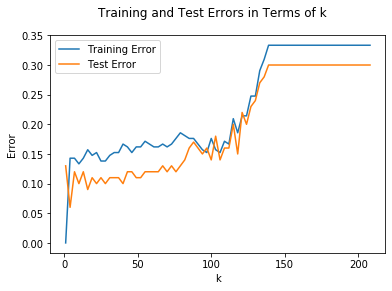

In [14]:
# Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). 
fig, ax = plt.subplots()
line1 = ax.plot(k_values, training_errors, label="Training Error")
line2 = ax.plot(k_values, test_errors, label = "Test Error")
plt.legend(loc="upper left")
fig.suptitle('Training and Test Errors in Terms of k', fontsize=12)
ax.set_xlabel('k', fontsize=10)
ax.set_ylabel('Error', fontsize='medium') 
ax.xaxis.label.set_size(10)
plt.draw()

In [15]:
# Which k* is the most suitable k among those values?
k_star = (len(test_errors[-1:]) - np.argmin(test_errors[-1:]))*3 + 1
print("The k* I when evaluating on the test set is", k_star, ".")

The k* I when evaluating on the test set is 4 .


In [16]:
# Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*

kneigh_new = KNeighborsClassifier(n_neighbors = 4)
kneigh_new.fit(x_train, y_train)
y_prednew = kneigh_new.predict(x_test)

# Find confusion matrix when k=k*
tn, fp, fn, tp = confusion_matrix(y_test, y_prednew).ravel()
(tn, fp, fn, tp) # The true positive rate is 69 and the true negative rate is 25. 

(25, 5, 1, 69)

In [17]:
# Find precision when k=k* 
precision_score(y_test, y_prednew, average=None)

array([0.96153846, 0.93243243])

In [18]:
# Find F1 score when k=k* 
f1_score(y_test, y_prednew, average=None)

array([0.89285714, 0.95833333])

### c) Classification using KNN on Vertebral Column Data Set
#### iii) . Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, 3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. 4 Note: for each N, select your training set by choosing the first floor N/3 rows of Class 0 and the first N − floor N/3 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve. 

In [19]:
# Plot the best test error rate,which is obtained by some value of k, against the size of training set, when the 
# size of training set is N ∈ {10, 20, 30, . . . , 210}.

# Array of training set N from 10 to 210 in increments of 10
setsize = np.arange(10, 220, 10)

kBest = [] # Empty collection of the best k values for the test set 
trainingErrorsBest = [] # Best training errors of best k values for each N
testErrorsBest = [] # Best test errors of best k values for each N 

for N in setsize: # Outer for loop iterates over all possible N values
    # Take x training values, create 2 new dataframes for class 0 and class 1, where I only take the first floor N/3 rows 
    # of class 0 and the first N-floorN/3 rows of class 1. Repeat the same for y training values.  
    class0rows = math.floor(N/3)
    class1rows = N - class0rows
    x0_trainNew = x0_train[:class0rows]
    y0_trainNew = y0_train[:class0rows]
    x1_trainNew = x1_train[:class1rows]
    y1_trainNew = y1_train[:class1rows]
    
    # Test data 
    x0_testNew = x0_test[:class0rows]
    y0_testNew = y0_test[:class0rows]
    x1_testNew = x1_test[:class1rows]
    y1_testNew = y1_test[:class1rows]
    
    # Concatenate the new training and test sets for x and y. 
    x_trainNew = [x0_trainNew, x1_trainNew]
    y_trainNew = [y0_trainNew, y1_trainNew] 
    x_trainNewing = pd.concat(x_trainNew)
    y_trainNewing = pd.concat(y_trainNew)
    
    # Test data 
    x_testNew = [x0_testNew, x1_testNew]
    y_testNew = [y0_testNew, y1_testNew] 
    x_testNewing = pd.concat(x_testNew)
    y_testNewing = pd.concat(y_testNew)
    
    # Generate array of all k values for N, in increments of 5.
    kset = np.arange(1,N,5)
    # For each individual k in each array of k's based on setsize, now find optimal k with lowest errors.
    iter_ks = [] # List of all the k's for each N
    iter_test_errors = [] # List of the all the training errors for each k within each N
    iter_train_errors = [] # List of the test errors for each within for each N
    for optk in kset: 
        iter_ks.append(optk)
        
        # kNN to classify for each k in kset of each N 
        kneighlearn = KNeighborsClassifier(n_neighbors=optk, metric='euclidean')
        
        # Fitting the data 
        kneighlearn = kneighlearn.fit(x_trainNewing, y_trainNewing)
        
        # Predict each y for each x_trainNewing for every optk in kset within size N
        ytraining_predictNew = kneighlearn.predict(x_trainNewing) 
        
        # Find errors of model for training data for each optk in kset within size N
        trainingerrors = 1-accuracy_score(y_trainNewing, ytraining_predictNew)
        
        # Append all training errors to iter_test_errors for each optk in kset
        iter_train_errors.append(trainingerrors) 
        
        # Predict each y for each x_testNewing for every optk in kset within size N
        ytest_predictNew = kneighlearn.predict(x_testNewing) 
        
        # Find errors of model for test data for each optk in kset within size N
        testingerrors = 1-accuracy_score(y_testNewing, ytest_predictNew)
        
        # Append all test errors to iter_test_errors for each optk in kset: 
        iter_test_errors.append(testingerrors)
        
    # Find the best minimum errors for each training error in N. Argmin returns index of the minimum error in an array,
    # not the actual value of what the minimum error is. 
    optimalTrainErrors = np.argmin(iter_train_errors)
    
    # Find the best minimum errors for each testing error in N. Argmin returns index of the minimum error in an array,
    # not the actual value of what the minimum error is. 
    optimalTestErrorsindexes = np.argmin(iter_test_errors)
    optimalTestErrors = iter_test_errors[optimalTestErrorsindexes]
    optimalkvalues = iter_ks[optimalTestErrorsindexes]
    kBest.append(optimalkvalues)
    testErrorsBest.append(optimalTestErrors)

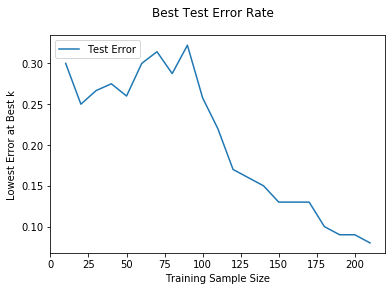

In [20]:
# Plot best test error rate
fig, ax = plt.subplots()
line2 = ax.plot(setsize, testErrorsBest, label = "Test Error")
plt.legend(loc="upper left")
fig.suptitle('Best Test Error Rate', fontsize=12)
ax.set_xlabel('Training Sample Size', fontsize=10)
ax.set_ylabel('Lowest Error at Best k', fontsize='medium') 
ax.xaxis.label.set_size(10)
plt.draw()